# 00. Contents

### 01. Importing libraries

### 02. Importing data

### 03. Visual analysis prep

### 04. Heatmapping

### 05. Scatterplots

### 06. Pair plot

### 07. Categorical plot

### 08. Notes

# 01. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02. Importing data

In [8]:
# Creating a path

path = r'/Users/agne/Documents/Studies/Data Analysis/Study Materials/Advanced Analytics'

In [70]:
df_income = pd.read_csv(os.path.join(path, '6.1 Sourcing the Data', 'cleaned_income.csv'), index_col=False)

# 03. Visual Analysis prep

In [72]:
df_income.shape

(3144, 9)

In [74]:
df_income.head()

,Unnamed: 0,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
0,0,Autauga County,Alabama,1001,1,1,59285,69841,Urban
1,1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban
2,2,Barbour County,Alabama,1005,1,5,24757,44290,Rural
3,3,Bibb County,Alabama,1007,1,7,22152,51215,Rural
4,4,Blount County,Alabama,1009,1,9,59292,61096,Urban


In [76]:
# Dropping the Unnamed column

df_income.drop(columns = ['Unnamed: 0'], inplace=True)

In [78]:
df_income.shape

(3144, 8)

In [80]:
# Dropping the FIPS columns

df_income.drop(columns = ['FIPS'], inplace=True)
df_income.drop(columns = ['State FIPS Code'], inplace=True)
df_income.drop(columns = ['County FIPS Code'], inplace=True)

In [82]:
df_income.head()

,County,State,Total Population,Median Household Income,Urban-Rural
0,Autauga County,Alabama,59285,69841,Urban
1,Baldwin County,Alabama,239945,75019,Urban
2,Barbour County,Alabama,24757,44290,Rural
3,Bibb County,Alabama,22152,51215,Rural
4,Blount County,Alabama,59292,61096,Urban


In [87]:
# Dropping the categorical columns

df_income.drop(columns = ['Urban-Rural'], inplace=True)
df_income.drop(columns = ['State'], inplace=True)
df_income.drop(columns = ['County'], inplace=True)

# 04. Heatmapping

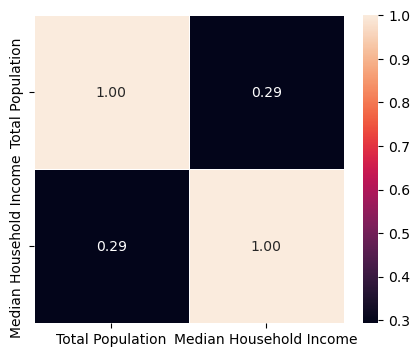

In [97]:
# Compute the correlation matrix
corr_matrix = df_income.corr()

# Create the heatmap
plt.figure(figsize=(5, 4))  

# Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.show()

The relationship between median household income and total population is weak.

# 05. Scatterplots

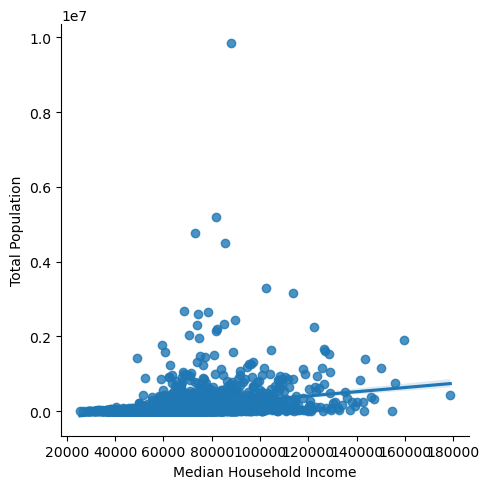

In [101]:
# Create a scatterplot for the "Median household income" and "tital population" columns in seaborn

sns.lmplot(x = 'Median Household Income', y = 'Total Population', data = df_income)

The skew of the line is very minimal. So, the correlation is not too strong.

# 06. Pair plot

In [119]:
# Re-importing the data set with all the variables

df_full = pd.read_csv(os.path.join(path, '6.1 Sourcing the Data', 'cleaned_income.csv'), index_col=False)

In [121]:
df_full.shape

(3144, 9)

In [123]:
# Dropping the Unnamed column

df_full.drop(columns = ['Unnamed: 0'], inplace=True)

In [125]:
df_full.head()

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
0,Autauga County,Alabama,1001,1,1,59285,69841,Urban
1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban
2,Barbour County,Alabama,1005,1,5,24757,44290,Rural
3,Bibb County,Alabama,1007,1,7,22152,51215,Rural
4,Blount County,Alabama,1009,1,9,59292,61096,Urban


In [127]:
# Keeping only the variables that are suitable for the pair plot

pair_plot = df_full[['County', 'State', 'Total Population', 'Median Household Income', 'Urban-Rural']]

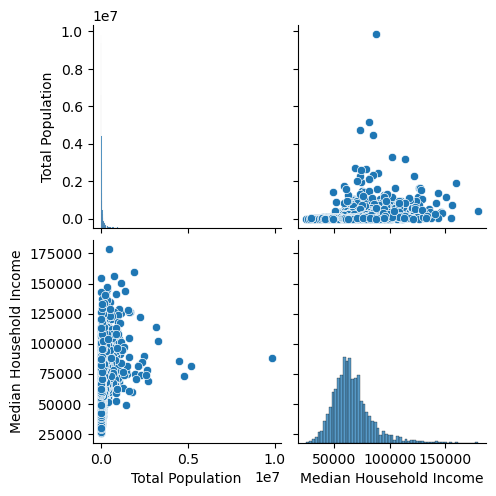

In [129]:
# Create a pair plot 

graph = sns.pairplot(pair_plot)

Again, I don't really see the correlation here. I wonder if the results would be more interesting if we were able to compare the rural and the urban areas. I am looking forward to exploring that visually in other tasks.

# 07. Categorical plot

<Axes: xlabel='Median Household Income', ylabel='Count'>

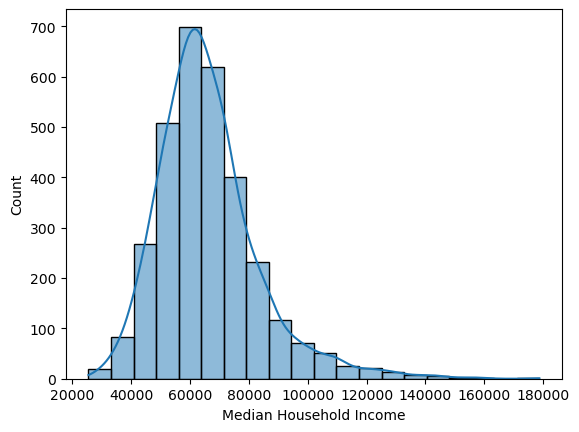

In [136]:
# Creating a histogram

sns.histplot(df_full['Median Household Income'], bins = 20, kde = True)

In [142]:
# Creating the categories for median income

df_full.loc[df_full['Median Household Income'] < 50000, 'Income Bracket'] = 'Low income'

In [146]:
df_full.loc[(df_full['Median Household Income'] >= 50000) & (df_full['Median Household Income'] < 80000), 'Income Bracket'] = 'Middle income'

In [148]:
df_full.loc[df_full['Median Household Income'] >= 80000, 'Income Bracket'] = 'High income'

In [154]:
# Checking the results

df_full['Income Bracket'].value_counts()

Income Bracket
Middle income    2181
High income       508
Low income        455
Name: count, dtype: int64

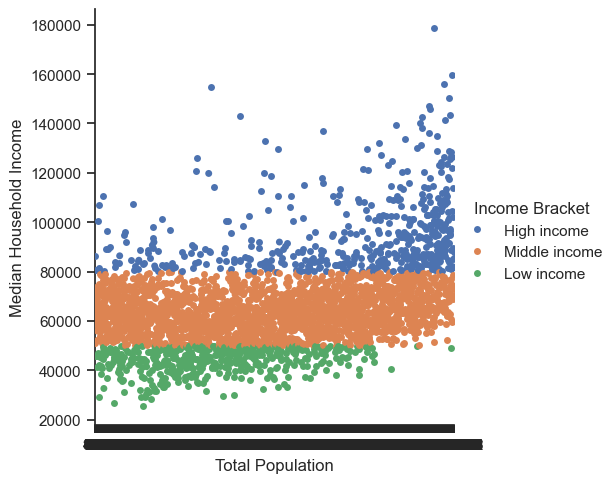

In [164]:
# Creating a categorical plot in seaborn using the income brackets created above

sns.set(style='ticks')
graph2 = sns.catplot(x='Total Population', y='Median Household Income', hue='Income Bracket', data=df_full)

It looks like the lower income people live in places where there is less population. If the area has a higher population, then the media household income also goes up.

# 08. Notes

Questions:

**How does the population size affect the average income? Is there a difference between rural and urban areas?**

It seems that the bigger the population size, the higher the income is, and vice versa. 


**Is there a connection between total population and median household income?**

The connection is there, but it is quite weak.



**Possible hypothesis:**

If a person lives in an urban area, then they will have less money than those in rural areas.